In [1]:
import pandas as pd
import numpy as np
import datetime

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Ignore warning
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
print("Training dataset has {} rows and {} columns".format(train_data.shape[0], train_data.shape[1]))

Training dataset has 891 rows and 12 columns


In [4]:
test_data  = pd.read_csv("test.csv")
test_data.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [5]:
print("Test dataset has {} rows and {} columns".format(test_data.shape[0], test_data.shape[1]))

Test dataset has 418 rows and 11 columns


### EDA

#### Check for missing values

In [6]:
pd.DataFrame(train_data.isnull().sum().sort_values(ascending = False), columns=['# Missing values'])

,# Missing values
Cabin,687
Age,177
Embarked,2
Fare,0
Ticket,0
Parch,0
SibSp,0
Sex,0
Name,0
Pclass,0


In [7]:
# how many total missing values do we have?
total_cells = np.product(train_data.shape)
total_missing = train_data.isnull().sum().sum()

# percent of training data that is missing
(total_missing/total_cells) * 100

8.099513655069211

In [8]:
pd.DataFrame(test_data.isnull().sum().sort_values(ascending = False), columns=['# Missing values'])

,# Missing values
Cabin,327
Age,86
Fare,1
Embarked,0
Ticket,0
Parch,0
SibSp,0
Sex,0
Name,0
Pclass,0


In [9]:
# how many total missing values do we have?
total_cells = np.product(test_data.shape)
total_missing = test_data.isnull().sum().sum()

# percent of training data that is missing
(total_missing/total_cells) * 100

9.00391474554154

It can be observed that in training data, 8% of data is missing which includes 2 Embarked values and mostly Cabin and Age features. Whereas, in test data 9% data is missing.

At this point, one might think that why the values are missing. Are they missing because they don't exist or they were not recorded. If they don't exist then it doesn't make sense to try and guess what it might be. However, if they were not recorded then they can be guessed what they might have been based on the other values in that column and row. Let's see what missing values can be filled.

#### Handle missing values

##### Embarked feature in training set

In [10]:
pd.DataFrame(train_data['Embarked'].value_counts(dropna=False))

,Embarked
S,644
C,168
Q,77
NaN,2


It looks like there are only two null values in the Embarked feature, so it can be replaced with the mode value "S."

Let's see what are those two null values.

In [11]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


It can be seen that both passengers paid a fare of $80, are of Pclass 1 and are female. But, one is 38 years and the other is 62 years. Let's see how Fare and Age features are distributed among all Pclass and Embarked feature values.

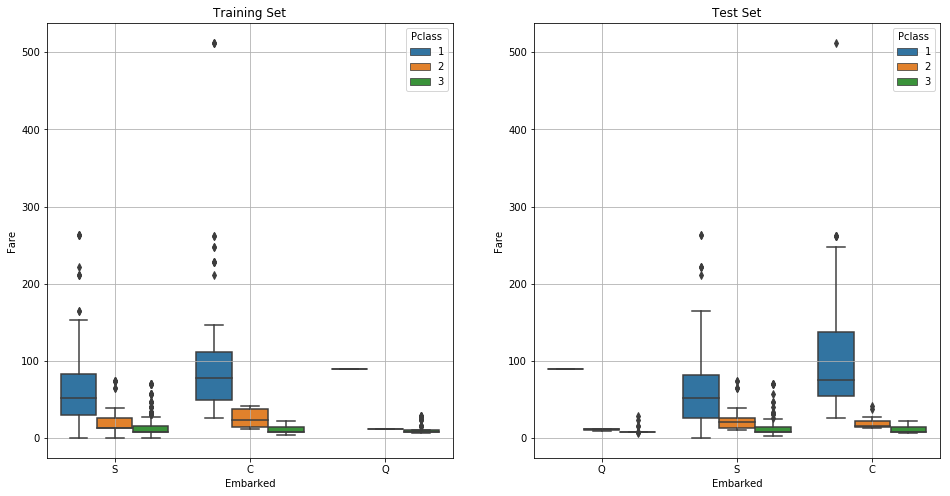

In [12]:
fig, ax = plt.subplots(figsize=(16,8),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_data, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test_data, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 12)
ax2.set_title('Test Set',  fontsize = 12)
ax1.grid('True')
ax2.grid('True')
fig.show()

Here, in both training set and test set, the average fare closest to $80 are in the C Embarked values. 

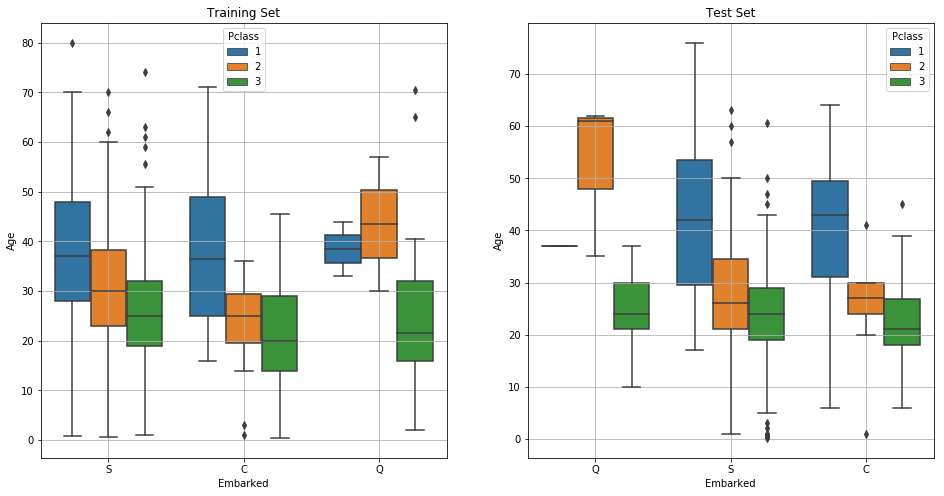

In [13]:
fig, ax = plt.subplots(figsize=(16,8),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Age", hue="Pclass", data=train_data, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Age", hue="Pclass", data=test_data, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 12)
ax2.set_title('Test Set',  fontsize = 12)
ax1.grid('True')
ax2.grid('True')
fig.show()

Here, in both training set and test set, the range of 30-40 years of PClass 1 people has Embarked C values. But. no sign for 62 years of age. So, let's fill in the missing values as "C" 

In [14]:
train_data.Embarked.fillna("C", inplace=True)

##### Fare feature in test set

In [15]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


It can beseen that the passenger is a male of 60 years from PClass 3 and Embarked S. So, this fare can be filled with the avarage fare of fares with these specific values.`

In [16]:
avg_fare = test_data[(test_data['Pclass'] == 3) & (test_data['Sex'] == 'male') & (test_data['Embarked'] == 'S')]['Fare'].mean()
avg_fare

12.718872

In [17]:
test_data.Fare.fillna(round(avg_fare,2), inplace=True)

##### Cabin feature in training and test set

In [18]:
print("Train Cabin missing: " + str(train_data.Cabin.isnull().sum()/len(train_data.Cabin)))
print("Test Cabin missing:  " + str(test_data.Cabin.isnull().sum()/len(test_data.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing:  0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data and 78% missing in the test data. From my perspective, I do not see a clear contribution of Cabin feature in predicting whether the person is survived or not. I think, I should drop this feature from both the sets.

In [19]:
train_data = train_data.drop(columns=['Cabin'])
test_data  = test_data.drop(columns=['Cabin'])

##### Age feature in training and test set

In [20]:
print("Missing ages in training data:  " + str(round((train_data.Age.isnull().sum()/len(train_data.Age))*100,2))+str("%"))
print("Missing ages in test data:      " + str(round((test_data.Age.isnull().sum()/len(test_data.Age))*100,2))+str("%"))

Missing ages in training data:  19.87%
Missing ages in test data:      20.57%


Almost 20% of age is missing from both training set and test set. To fill the missing values, I will use Random Forest Regressor to predict the missing ages based on ages present.

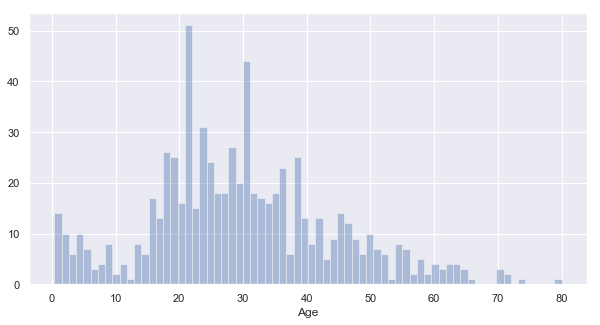

In [21]:
# Before filling missing values
sns.set(color_codes=True)
plt.subplots(figsize = (10,5),)
sns.distplot(train_data['Age'].dropna(), bins = 70, kde = False, rug = False, norm_hist=False)

In [22]:
training_set = train_data[["Survived", "Age", "Sex", "Pclass","SibSp","Parch","Fare","Embarked"]]
test_set     = test_data[["Age", "Sex", "Pclass","SibSp","Parch","Fare","Embarked"]]

In [23]:
training_set.head(2)

,Survived,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
0,0,22.0,male,3,1,0,7.2500,S
1,1,38.0,female,1,1,0,71.2833,C


In [24]:
test_set.head(2)

,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
0,34.5,male,3,0,0,7.8292,Q
1,47.0,female,3,1,0,7.0000,S


Here, Sex and embarked are categorical values. Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. So, I will be using the label encoding approach to convert each value in a column to a number.

In [25]:
# convert the columns to category
training_set["Sex"] = training_set["Sex"].astype('category')
test_set["Sex"]     = test_set["Sex"].astype('category')

training_set["Embarked"] = training_set["Embarked"].astype('category')
test_set["Embarked"]     = test_set["Embarked"].astype('category')

# assign the encoded variable to a new column using the cat.codes accessor
training_set["Sex"] = training_set["Sex"].cat.codes
test_set["Sex"]     = test_set["Sex"].cat.codes

training_set["Embarked"] = training_set["Embarked"].cat.codes
test_set["Embarked"]     = test_set["Embarked"].cat.codes

This assigned male as 1, female as 0 and S as 2, C as 0 and Q as 1

In [26]:
training_set.head(2)

,Survived,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
0,0,22.0,1,3,1,0,7.2500,2
1,1,38.0,0,1,1,0,71.2833,0


In [27]:
test_set.head(2)

,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
0,34.5,1,3,0,0,7.8292,1
1,47.0,0,3,1,0,7.0000,2


###### Predict missing ages with Random Forest Regressor 

In [28]:
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
def PredictMissingAge(df):
    
    # get all the features except survived
    age_df = df.loc[:,"Age":]
    
    # split the dataframe into train with all the age valuess and test without the age values
    train_age = age_df.loc[age_df.Age.notnull()]
    test_age  = age_df.loc[age_df.Age.isnull()]
    
    X = train_age.loc[:, "Sex":].values
    y = train_age.Age.values
    
    regressor = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    regressor.fit(X,y)
    
    # predict the ages
    predicted_age = regressor.predict(test_age.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

PredictMissingAge(training_set);
PredictMissingAge(test_set);

C:\Users\monal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
print(training_set.isnull().sum())
print(test_set.isnull().sum())

Survived    0
Age         0
Sex         0
Pclass      0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Age         0
Sex         0
Pclass      0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


So, no missing values now.

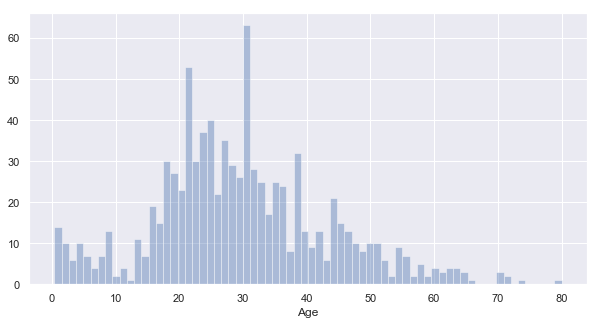

In [30]:
# After filling missing values
plt.subplots(figsize = (10,5),)
sns.distplot(training_set['Age'], bins = 70, kde = False, rug = False, norm_hist=False)

Before filling the missing ages, we saw that most of the passengers belong to a range of 20-40 years. After predicting the missing ages, the count of passengers increased mostly in the range of 20-40 years.

## Visualization and Feature Relations

Before we dive into finding relations between different features and our dependent variable(survivor) let us create some predictions about how the relations may turnout among features.

#### Predictions:

- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others.
- Age: Younger passenger survived more than other passengers.

Now, let's see how the features are related to each other by creating some visualizations.

##### Gender & Survived

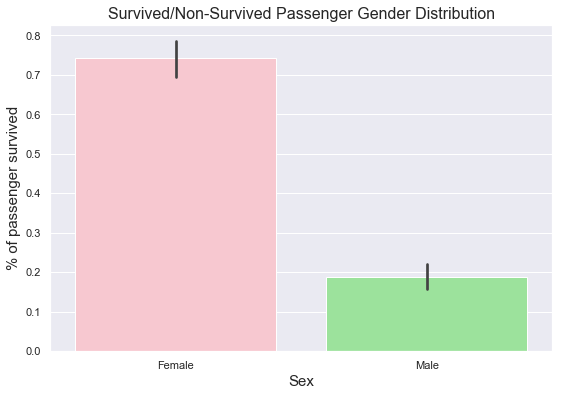

In [31]:
pal = {1:"lightgreen", 0:"Pink"}
plt.subplots(figsize = (9,6))

ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data = training_set,
                 palette = pal)

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 16)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15)

labels = ['Female', 'Male']
plt.xticks(sorted(training_set.Sex.unique()), labels)
plt.show()

The bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

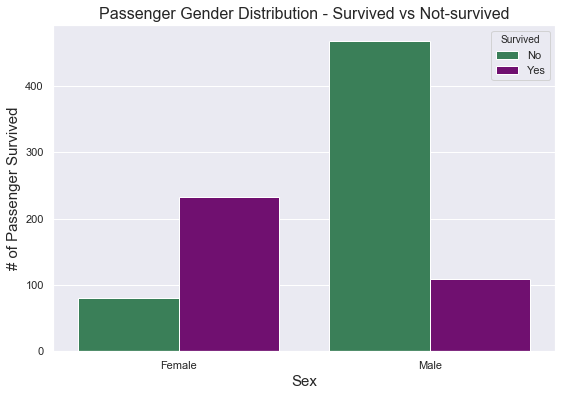

In [32]:
pal = {1:"purple", 0:"seagreen"}

plt.subplots(figsize = (9,6))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = training_set, 
                   palette = pal)

plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 16)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)
plt.xticks(sorted(training_set.Sex.unique()), labels)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This countplot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

The above two graphs bolster the fact that females and children were the priority.

##### PClass & Survived

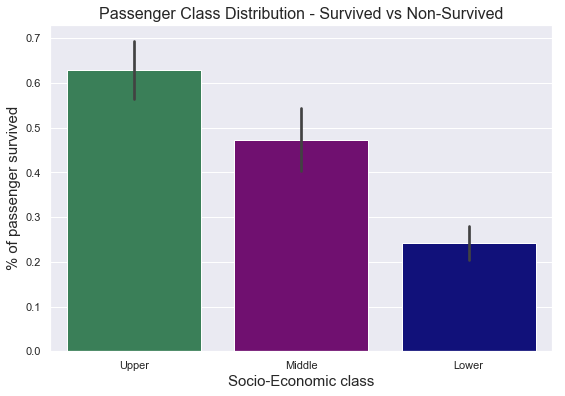

In [33]:
pal = {1:"seagreen", 2:"purple", 3:"darkblue"}

plt.subplots(figsize = (9,6))

ax = sns.barplot(x = "Pclass", 
                 y = "Survived", 
                 data = training_set,
                 palette = pal)

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 16)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Socio-Economic class",fontsize = 15)

labels = ['Upper', 'Middle', 'Lower']
val = [0,1,2]
plt.xticks(val, labels)
plt.show()

Thw above plot of passenger clas distribution indicates that passengers were prioritized according to their classes to survive. Means, upper class people were first offered help for survival

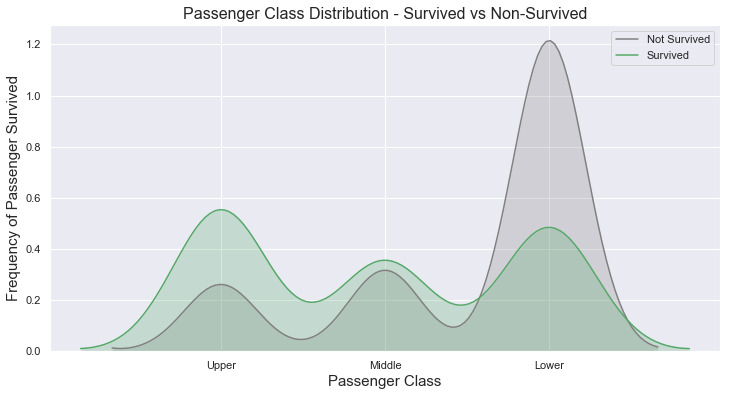

In [34]:
# Kernel Density Plot
fig = plt.figure(figsize=(12,6),)
 
ax = sns.kdeplot(training_set.Pclass[training_set.Survived == 0] , 
               color = 'gray',
               shade = True,
               label = 'Not Survived')
ax = sns.kdeplot(training_set.Pclass[training_set.Survived == 1] , 
               color = 'g',
               shade = True, 
               label = 'Survived')

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 16)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)

labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(training_set.Pclass.unique()), labels);

The KDE plots encode the density of observations on one axis with height along the other axis. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Thisplot might seem slightly contradicting to the previous one. It shows that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second.

##### Fare & Survived

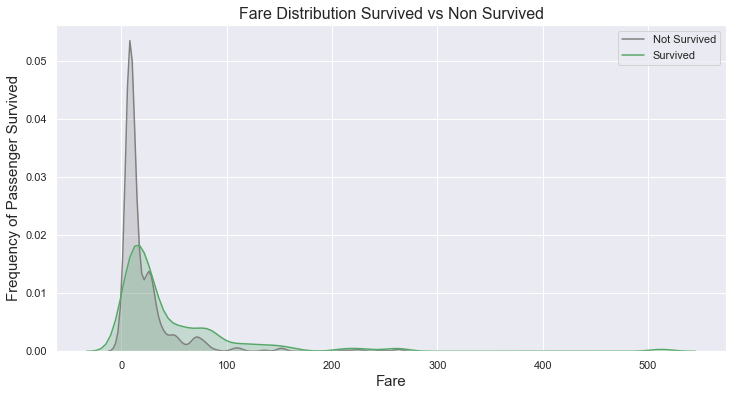

In [35]:
# Kernel Density Plot
fig = plt.figure(figsize=(12,6),)

ax=sns.kdeplot(training_set.Fare[training_set.Survived == 0] , color='gray', shade = True, label = 'Not Survived')
ax=sns.kdeplot(training_set.Fare[training_set.Survived == 1] , color='g', shade = True, label = 'Survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 16)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)
plt.show()

The spike in the plot indicates that passengers who had bought tickets under 100 dollar did not survive. When the fare is approximately more than 270 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment.

In [36]:
training_set[training_set.Fare > 270]

,Survived,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
258,1,35.0,0,1,0,0,512.3292,0
679,1,36.0,1,1,0,1,512.3292,0
737,1,35.0,1,1,0,0,512.3292,0


##### Age & Survived

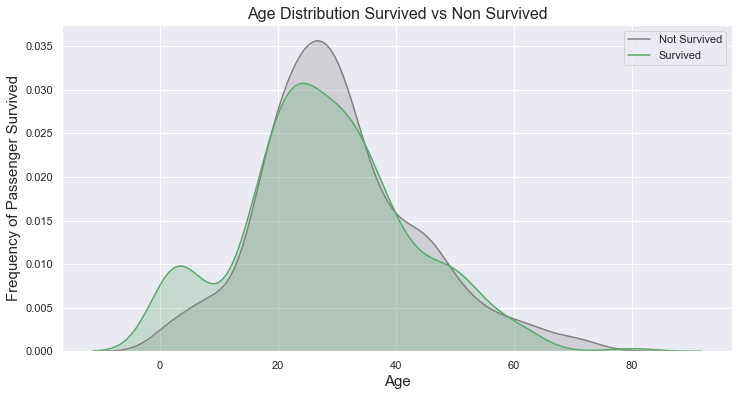

In [37]:
# Kernel Density Plot
fig = plt.figure(figsize=(12,6),)

ax=sns.kdeplot(training_set.Age[training_set.Survived == 0] , color='gray', shade = True, label = 'Not Survived')
ax=sns.kdeplot(training_set.Age[training_set.Survived == 1] , color='g', shade = True, label = 'Survived')
plt.title('Age Distribution Survived vs Non Survived', fontsize = 16)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.show()

This plot indicates that children and infants were the priority, therefore, a good chunk of infant/children were saved.

##### Embarked & Survived

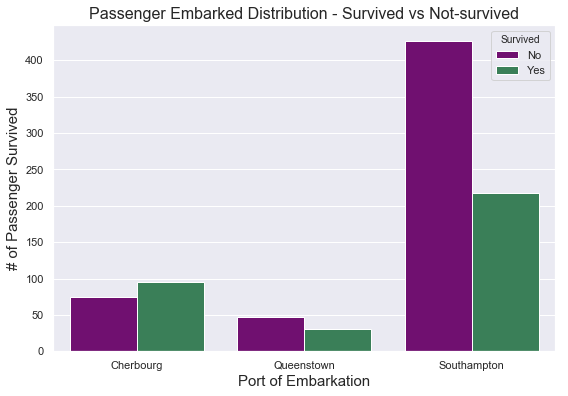

In [38]:
pal = {0:"purple", 1:"seagreen"}

plt.subplots(figsize = (9,6))
ax = sns.countplot(x = "Embarked", 
                   hue="Survived",
                   data = training_set, 
                   palette = pal)

plt.title("Passenger Embarked Distribution - Survived vs Not-survived", fontsize = 16)
plt.xlabel("Port of Embarkation", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(sorted(training_set.Embarked.unique()), labels)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

Port of Embarkation doesn't contribute much to the survival rate. This plot just indicates that most of the passengers boardede from Southampton.

##### SibSp, Parch & Survived

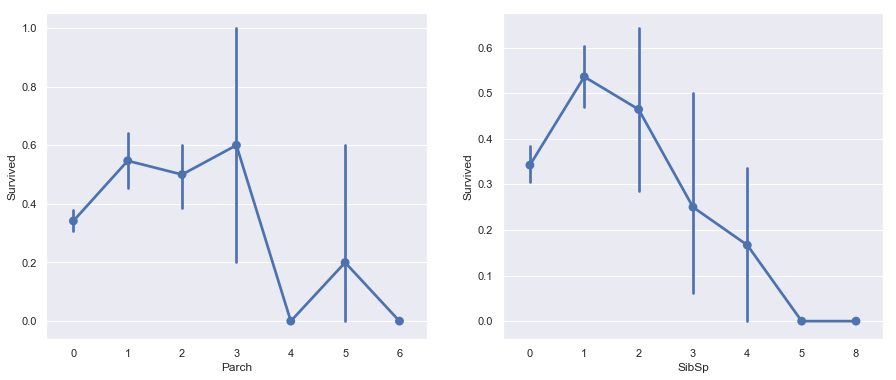

In [39]:
# Create a figure instance, and the two subplots
fig, ax = plt.subplots(figsize=(15,6),ncols=2)

ax1 = sns.factorplot(x = "Parch", y = "Survived", data = training_set[training_set.Fare < 500], kind = "point",size = 8, ax = ax[0])
ax2 = sns.factorplot(x = "SibSp", y = "Survived", data = training_set[training_set.Fare < 500], kind = "point",size = 8, ax = ax[1])

plt.close(ax1.fig)
plt.close(ax2.fig)

plt.show()

Passengers who traveled in big groups with parents/children(Parch) had less survival rate than other passengers. Whereas, passengers who traveled in small groups with sibilings/spouses(SibSp) had more survival rate than other passengers.

### Correlations

In [40]:
pd.DataFrame(abs(training_set.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Embarked,0.174199
Parch,0.081629
Age,0.077130
SibSp,0.035322


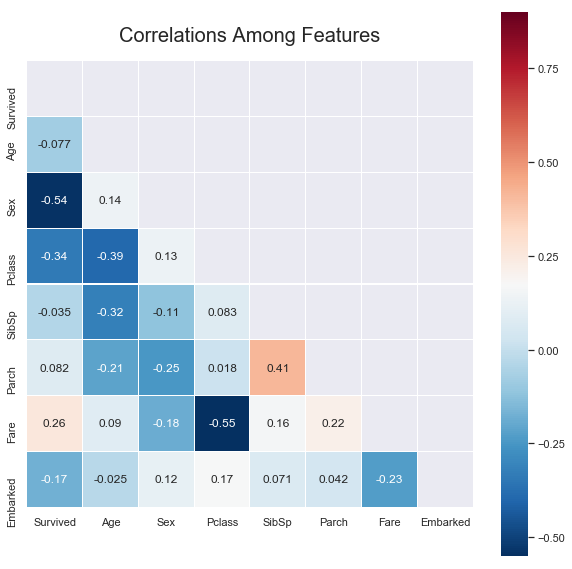

In [41]:
mask = np.zeros_like(training_set.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (10,10))
sns.heatmap(training_set.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

#### Positive Correlation Features:

- Fare and Survived: 0.26

#### Negative Correlation Features:

- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33

Let's analyze these correlations a bit. We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived i.e. 0.26. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive meansthey must be 1st class or 2nd class. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived, -0.33. 

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.55 points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is.

### Statistical Test for Correlation

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of the trials and see how we are doing with our predictions.

#### Hypothesis Testing Outline
A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.

A hypothesis test consists of 4 steps:

#### Step 1: a) Develop Hypothesis
##### Null hypothesis ( H0 ) 
The null hypothesis( H0 ) is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations  are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.

##### Alternative hypothesis( HA )
It is a claim and the opposite of the null hypothesis. It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.

#### b) State Significance Level
The significance level( α ) is the probability of rejecting a null hypothesis when it is true. In other words, we are comfortable/confident with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%.

#### Step 2: Identify test statistics
Test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test.

#### Step 3: Determine p-value
P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis was correct. The smaller the P-value, the stronger the evidence against the null hypothesis.

#### Step 4: Describe the result and compare the p-value with the significance value( α )
If p <= α , then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p > α , we say that, we fail to reject the null hypothesis.

Each of these steps are followed to do the hypothesis testing.

##### Step 1: Null Hypothesis( H0 )
The mean sex between the passenger who survived and passenger who did not survive is zero.

##### Alternative Hypothesis( HA )
There is a difference in the survival rate between male and female is not zero.

##### State Significance Level
Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. Let's take significance level(α) = 0.05. So, our confidence interval or non-rejection region would be (1 - α)=95%.

##### Step 2:  Identify test statistics
This will be a two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. Since we do not know the standard deviation( σ ) and n is small, we will use the t-distribution.

##### Step 3: Computing T-statistics and P-value

In [42]:
# separating male and female dataframe 
male   = training_set[training_set['Sex'] == 1]
female = training_set[training_set['Sex'] == 0]

# getting 50 random sample for male and female. 
import random
male_sample = random.sample(list(male['Survived']),50)
female_sample = random.sample(list(female['Survived']),50)

# Taking a sample means of survival feature from male and female
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)

print ("Male sample mean: " + str(male_sample_mean))
print ("Female sample mean: " + str(female_sample_mean))
print ("Difference between male and female sample mean: " + str(female_sample_mean - male_sample_mean))

Male sample mean: 0.2
Female sample mean: 0.82
Difference between male and female sample mean: 0.6199999999999999


When we perform a t-test we are usually trying to find out an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).

In [43]:
import scipy.stats as stats

print (stats.ttest_ind(male_sample, female_sample))
print ("\np-value: " + format(stats.ttest_ind(male_sample, female_sample).pvalue, '.32f'))

Ttest_indResult(statistic=-7.825220138824614, pvalue=5.975261559086169e-12)

p-value: 0.00000000000597526155908616928875


##### Step 4: Describe the result and compare the p-value with the significance value( α )

It looks like the p-value is very small compared to our significance level( α )of 0.05. Our observation sample is statistically significant. Therefore, we reject the null hypothesis, and the alternative hypothesis is valid, which is 
#### "There is a significant difference in the survival rate between the male and female passengers.

### Pre-Modeling Tasks

#### Separating dependent and independent variables in training dataset

In [44]:
X = training_set.drop(['Survived'], axis=1)
y = training_set["Survived"]

#### Splitting the training data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 0)

#### Feature Scaling

Feature scaling is an important concept of machine learning models. It can vary results a lot while using certain algorithms and have a minimal or no effect in others. Most of the times, a dataset contain features highly varying in magnitude and unit. For some machine learning models, it is not a problem. However, for many other machine learning algorithms, that uses euclidian distances to calculate the distance between two points, it is quite a problem.

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test  = pd.DataFrame(sc.transform(X_test))

test_set = pd.DataFrame(sc.transform(test_set))

In [47]:
X_train.columns = X.columns
X_test.columns = X.columns
test_set.columns = X.columns

### Modeling

Since it is a classification problem, I will be using machine learning classifiers to get the best prediction possible. I will use the following models: 

- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- MLP Classifier
- Support Vector Machines
- Decision Tree Classifier
- Bagging Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier
- ExtraTrees Classifier
- GaussianProcess Classifier

In [48]:
# Import libraries for the classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support

In a voting classifier, setting the voting parameter to soft enables the classifiers to calculate their probability(also known as confidence score) individually and present it to the voting classifier, then the voting classifier averages them and outputs the class with the highest probability.

In [49]:
voting_classifier = VotingClassifier(estimators=[
    ("Logistic Regression",LogisticRegression()),  
    ("KNN",KNeighborsClassifier(n_jobs = -1)),
    ("Naive Bayes",GaussianNB()),  
    ("MLP",MLPClassifier(alpha=1)),
    ("SVM",SVC(kernel = 'rbf', probability=True, random_state = 1, C = 3)),
    ("Decision Tree",DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=3, min_samples_leaf=5)),
    ("Bagging",BaggingClassifier()),
    ("Random Forest",RandomForestClassifier(n_estimators = 150, random_state = 42, class_weight = "balanced")),
    ("Gradient Boosting",GradientBoostingClassifier()),
    ("AdaBoost",AdaBoostClassifier()),
    ("ExtraTrees",ExtraTreesClassifier()),
    ("Gaussian Process",GaussianProcessClassifier())
], voting = 'soft')

In [50]:
warnings.filterwarnings('ignore')

names = ["Logistic Regression", 
         "KNN", 
         "Naive Bayes",
         "MLP",
         "SVM",
         "Decision Tree",
         "Bagging",
         "Random Forest",
         "Gradient Boosting",
         "AdaBoost",
         "ExtraTrees",
         "Gaussian Process",
         "Voting Classifier"]

all_models = [
    LogisticRegression().fit(X_train,y_train),  
    KNeighborsClassifier(n_jobs = -1).fit(X_train,y_train),
    GaussianNB().fit(X_train,y_train),  
    MLPClassifier(alpha=1).fit(X_train,y_train),
    SVC(kernel = 'rbf', probability=True, random_state = 1, C = 3).fit(X_train,y_train),
    DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=3, min_samples_leaf=5).fit(X_train,y_train),
    BaggingClassifier().fit(X_train,y_train),
    RandomForestClassifier(n_estimators = 150, random_state = 42, class_weight = "balanced").fit(X_train,y_train),
    GradientBoostingClassifier().fit(X_train,y_train),
    AdaBoostClassifier().fit(X_train,y_train),
    ExtraTreesClassifier().fit(X_train,y_train),
    GaussianProcessClassifier().fit(X_train,y_train),
    voting_classifier.fit(X_train,y_train)]

model_scores = {}
n_errors = []
acc = []
precision = []
recall = []
f_score = []

for i in all_models:
    y_pred = i.predict(X_test)
    b = accuracy_score(y_pred, y_test)
    model_scores[i] = b
    
    # no. of misclassifications
    n_errors.append((y_pred != y_test).sum())

    acc.append(round(accuracy_score(y_test, y_pred)*100,2))

    # precision, recall, f1 score
    metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(metrics[0])
    recall.append(metrics[1])
    f_score.append(metrics[2])

In [51]:
results = pd.concat([pd.DataFrame(precision, columns = ['Precision']),
               pd.DataFrame(recall, columns = ['Recall']),
               pd.DataFrame(f_score, columns = ['F1 Score']),
               pd.DataFrame(acc, columns = ['Accuracy']),
               pd.DataFrame(n_errors, columns = ['No. of Misclassifications'])], axis = 1)

results.index = names
results = results.sort_values(['Accuracy'], ascending=[False])
results

,Precision,Recall,F1 Score,Accuracy,No. of Misclassifications
Gradient Boosting,0.837486,0.838565,0.837741,83.86,36
Voting Classifier,0.837288,0.838565,0.837281,83.86,36
Random Forest,0.832819,0.834081,0.831986,83.41,37
KNN,0.823535,0.825112,0.823458,82.51,39
MLP,0.819062,0.820628,0.818066,82.06,40
Gaussian Process,0.818932,0.820628,0.818652,82.06,40
SVM,0.814351,0.816143,0.813823,81.61,41
Decision Tree,0.815072,0.816143,0.815454,81.61,41
Bagging,0.814373,0.816143,0.814405,81.61,41
AdaBoost,0.816601,0.816143,0.816356,81.61,41


In [52]:
# Save two highest accuracy models
highest = max(model_scores.values())

models = [k for k, v in model_scores.items() if v == highest]
models

[GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)...restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
              random_state=None, warm_start=False))],
          flatten_transform=None, n_jobs=1, voting='soft', weights=None)]

#### Actual prediction for given test set

In [53]:
actual_data = pd.read_csv("gender_submission.csv")

In [54]:
warnings.filterwarnings('ignore')

for i in range(len(models)):
    test_prediction = models[i].predict(test_set)
    
    classifier_name = str(models[i]).split('(')[0]
    
    print("\n*********************{}*********************".format(classifier_name))
    print("Accuracy of actual prediction: ", round(accuracy_score(test_prediction, actual_data['Survived'])*100,2))
    print("No. of misclassifications:     ", (test_prediction != actual_data['Survived']).sum())
    
    if classifier_name == 'RandomForestClassifier':
       
        # extract important features
        score = np.round(models[i].feature_importances_,3)
        importances = pd.DataFrame({'features':X_train.columns,'importance':score})
        importances = importances.sort_values('importance',ascending=False).set_index('features')

        # plot importances
        plt.rcParams['figure.figsize'] = (15, 5)
        importances.plot.bar()
        plt.title('Important features in determining survival class', fontsize = 16)
        plt.show()


*********************GradientBoostingClassifier*********************
Accuracy of actual prediction:  90.19
No. of misclassifications:      41

*********************VotingClassifier*********************
Accuracy of actual prediction:  92.82
No. of misclassifications:      30
